# wyniki testów

In [2]:
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
results = get_db(r'C:\Users\a814811\OneDrive - Atos\RecommenderSystem\Piotr\model\test_model\test_results')

In [6]:
results.head()

,model,user,number_of_recomm,user_articles,precision,recall,model_ev
0,popularity,0,1,0,NaN,NaN,1.0
1,popularity,0,2,0,NaN,NaN,1.0
2,popularity,0,3,0,NaN,NaN,1.0
3,popularity,0,4,0,NaN,NaN,1.0
4,popularity,0,5,0,NaN,NaN,1.0


In [4]:
results[results['user_articles']<1][['model','user','user_articles']]

,model,user,user_articles
0,popularity,0,0
1,popularity,0,0
2,popularity,0,0
3,popularity,0,0
4,popularity,0,0
5,popularity,0,0
6,popularity,0,0
7,popularity,0,0
8,popularity,0,0
9,popularity,0,0


### precision and recalls for models, from every possible number of recommendations

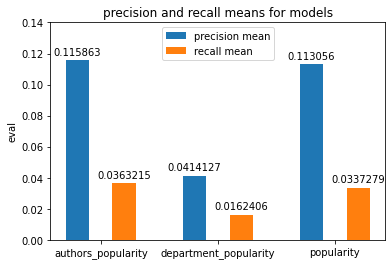

In [57]:
pre = results.groupby(['model'])['precision'].mean()
rec = results.groupby(['model'])['recall'].mean()


wd = 0.2
x = np.arange(3)

fig, ax = plt.subplots()
a1 = ax.bar(x-wd, pre.values, wd, label='precision mean')
a2 = ax.bar(x+wd, rec.values, wd, label='recall mean')
ax.set_ylabel('eval')
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
# limit dla osi y
plt.gca().set_ylim([0,0.14])

ax.bar_label(a1,padding=3)
ax.bar_label(a2,padding=3)
ax.legend(loc='upper center')
plt.title('precision and recall means for models')
plt.show()

#### % of users without recommendation for model

In [46]:
a = results.groupby(['model','user']).agg({'number_of_recomm': 'max'})
# a.count() # 1001
a = a[a['number_of_recomm']==0] 
a.groupby(['model']).agg({'number_of_recomm': 'count'})
# odejmuje 1, bo to uzytkownik testowy bez niczego (powinno być NaN w tabeli)

,number_of_recomm
model,
authors_popularity,348
department_popularity,6


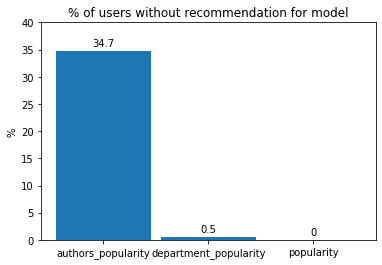

In [60]:
x = np.arange(3)
wd=0.9
fig, ax = plt.subplots()
a1 = ax.bar(x, [34.7,0.5,0], wd)
ax.set_xticks(x)
ax.set_xticklabels(pre.index)
ax.set_ylabel('%')
ax.bar_label(a1,padding=3)
plt.gca().set_ylim([0,40])
plt.title('% of users without any recommendation for model')
plt.show()